# Mistral Model

In [9]:
import os
import pandas as pd
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

### Sample examples with explanations, predictions and scores

In [26]:
data_save_dir = "/cluster/home/kamara/syntax-shap/data"
batch_size = 64

dataset = "rocstories"
model_name = "mistral"
threshold_ = 0.5


filter_ids_path = os.path.join(data_save_dir, f"{dataset}")
with open(os.path.join(filter_ids_path, f"{dataset}_{model_name}_stats.pkl"), "rb") as f:
    stats = pickle.load(f)

print("Size of the dataset:", stats["n_data"])
print("Size of filtered dataset:", stats["n_filtered"])
print("Maximum number of batches:", stats["n_filtered"]//batch_size)

FileNotFoundError: [Errno 2] No such file or directory: '/cluster/home/kamara/syntax-shap/data/rocstories/rocstories_mistral_stats.pkl'

In [6]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results_ids/explanations/{model_name}/{dataset}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-4]
            model_name = parts[-3]
            algorithm = parts[-2]
            seed = parts[-1].split('.pkl')[0]  # Removes the file extension
           
            # Construct the full file path
            file_path = os.path.join(folder_path, file)

            # Read the pickle file
            with open(full_path, 'rb') as file:
                data = pickle.load(file)

            # Assuming the content is a dictionary, create a DataFrame
            df = pd.DataFrame(data)
            # Add the extracted details as new columns
            df['algorithm'] = algorithm
            df['n_token'] = df['input'].str.split().apply(len)
            df['explanation'] = df['explanation'].apply(lambda x: x.reshape(-1))

            # Append to the list of dataframes
            df_list.append(df)

# Concatenate all dataframes in the list
df_explanation = pd.concat(df_list, ignore_index=True)
df_explanation


input_id                      input  \
0          291            A dog sees with   
1          421    Maria is a bride with a   
2          448        A wolf sees without   
3           63         Rome is located in   
4          362  Anna is a uncle without a   
...        ...                        ...   
1655       530            A person has no   
1656       491               A guitar has   
1657       333   Mark is a brother with a   
1658       151   Pittsburgh is located in   
1659        89      Chicago is located in   

                                            explanation  algorithm  n_token  
0                  [-29173.0, 28501.0, 3571.0, -3251.0]  partition        4  
1     [32656.0, -10314.0, -2781.0, 18059.0, 18148.0,...  partition        6  
2                 [-21649.0, 20525.0, -25224.0, 6448.0]  partition        4  
3              [-29036.0, -28348.0, -23678.0, -34334.0]  partition        4  
4     [12906.0, -20102.0, 5429.0, -13425.0, 22666.0,...  partition        6  
...                                                 ...        ...      ...  
1655  [0.30736842105263157, -0.0074432526814667, 0.0...     syntax        4  
1656  [0.16536725482150186, 0.606893721789085, 0.227...     syntax        3  
1657  [0.4922955121908309, -0.04679871567434428, -0....     syntax        6  
1658  [0.8454179254783484, 0.007804632426988921, 0.0...     syntax        4  
1659  [0.5021834061135372, 0.12970156095442595, -0.0...     syntax        4  

[1660 rows x 5 columns]

In [16]:
#### Select rows which input_ids are in the list of input_ids of the rows with algorithm = 'shap'

# Extract input_id values where algorithm is 'shap'
shap_input_ids = df_explanation[df_explanation['algorithm'] == 'shap']['input_id'].unique()

# Filter the DataFrame to keep rows where input_id is in shap_input_ids
filtered_df_explanation = df_explanation[df_explanation['input_id'].isin(shap_input_ids)]
filtered_df_explanation

input_id                                              input  \
64        1360             People can enjoy music by listening to   
65        2398       Some names are given a long time after their   
66        1566                 Japanese tea have a lot of kind of   
67         558             Many different languages are spoken in   
68        2690    Light can also cause the double bonds to form a   
...        ...                                                ...   
3363       105                          Some animals also can use   
3364      1570          Many people believe there is some form of   
3365      1422  Schools provide special education services to ...   
3366      1273                 Many people like to make their own   
3367      1052  Similar interactions cause the northern lights on   

                                            explanation  algorithm  n_token  
64    [21977.0, -5525.0, 10584.0, 6292.0, 7980.0, 96...  partition        7  
65    [30580.0, 17552.0, 28241.0, 19139.0, 32634.0, ...  partition        9  
66    [23313.0, -63219.0, 74428.0, -7306.0, 3508.0, ...  partition        8  
67    [-34986.0, 8200.0, 9417.0, -25627.0, -2951.0, ...  partition        6  
68    [5041.0, -21349.0, -4202.0, -44406.0, -35668.0...  partition       10  
...                                                 ...        ...      ...  
3363  [0.10385966698105555, 0.03616797591346406, 0.0...     syntax        5  
3364  [0.13284234503094844, 0.13687180542872254, 0.1...     syntax        8  
3365  [0.04788985660917734, 0.15194453477917483, 0.2...     syntax        7  
3366  [-0.007451466236859198, -0.0031032740744304653...     syntax        7  
3367  [0.35558585291522976, 0.05868420349132515, -0....     syntax        7  

[160 rows x 5 columns]

In [7]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results_ids/scores/{model_name}/{dataset}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            if eval(threshold) == threshold_:
                # Construct the full file path
                file_path = os.path.join(folder_path, file)

                # Read the pickle file
                with open(full_path, 'rb') as file:
                    data = pickle.load(file)

                # Assuming the content is a dictionary, create a DataFrame
                df = pd.DataFrame(data)
                # Add the extracted details as new columns
                df['algorithm'] = algorithm
                df['n_token'] = df['input'].str.split().apply(len)

                # Append to the list of dataframes
                df_list.append(df)

df_final_single_threshold = pd.concat(df_list, ignore_index=True)
df_final_single_threshold


fid_keep_rd  fid_keep   fid_rmv  log_odds_keep  acc_at_k  \
0        0.008225  0.008225  0.008225      -9.015039       0.2   
1        0.167778  0.167778  0.000000     -12.030405       0.0   
2        0.006083  0.006083  0.000000      -8.713431       0.1   
3        0.299905  0.303330  0.000000      -2.626641       0.1   
4        0.419514  0.395366  0.419514      -2.854843       0.3   
...           ...       ...       ...            ...       ...   
1655     0.010545  0.010545  0.000000      -9.263455       0.0   
1656     0.255470  0.255470  0.000000     -12.450865       0.2   
1657     0.008311  0.008311  0.008311      -9.025442       0.0   
1658     0.002538  0.002538  0.000000      -7.839481       0.1   
1659     0.536467  0.512186  0.000000      -3.005149       0.1   

      prob_diff_at_k  input_id                         input  algorithm  \
0           0.437691       383         Anna is a wife with a  partition   
1           0.707780        21            A grandmother is a  partition   
2           0.746086       476           A car moves without  partition   
3           0.746086       478           A car moves without  partition   
4           0.729710       346  George is a sister without a  partition   
...              ...       ...                           ...        ...   
1655        0.664698       530               A person has no     syntax   
1656        0.642074       491                  A guitar has     syntax   
1657        0.647462       333      Mark is a brother with a     syntax   
1658        0.920772       151      Pittsburgh is located in     syntax   
1659        0.902618        89         Chicago is located in     syntax   

      n_token  
0           6  
1           4  
2           4  
3           4  
4           6  
...       ...  
1655        4  
1656        3  
1657        6  
1658        4  
1659        4  

[1660 rows x 10 columns]

In [18]:
sample = pd.merge(filtered_df_explanation, df_final_single_threshold, on=['input', 'input_id', 'algorithm', 'n_token'])
df_str = pd.read_csv(f"/cluster/home/kamara/syntax-shap/data/{dataset}/{dataset}_{model_name}_{seed}_predictions.csv")
sample_with_y = pd.merge(sample, df_str, on=['input', 'input_id'])

In [19]:
sample_with_y

input_id                                              input  \
0        1360             People can enjoy music by listening to   
1        1360             People can enjoy music by listening to   
2        1360             People can enjoy music by listening to   
3        1360             People can enjoy music by listening to   
4        1360             People can enjoy music by listening to   
..        ...                                                ...   
155      1052  Similar interactions cause the northern lights on   
156      1052  Similar interactions cause the northern lights on   
157      1052  Similar interactions cause the northern lights on   
158      1052  Similar interactions cause the northern lights on   
159      1052  Similar interactions cause the northern lights on   

                                           explanation  algorithm  n_token  \
0    [21977.0, -5525.0, 10584.0, 6292.0, 7980.0, 96...  partition        7   
1    [0.026451325085081846, 0.038440944399347914, -...   syntax-w        7   
2    [-2.2429219857837497e-05, 3.3598871329486205e-...       lime        7   
3    [0.15731970881921256, 0.09945758881116337, 0.1...       shap        7   
4    [0.019282695246186393, 0.02802298234375686, -0...     syntax        7   
..                                                 ...        ...      ...   
155  [-4324.0, 38016.0, 8022.0, -8130.0, 7536.0, 74...  partition        7   
156  [0.3553768468299981, 0.08797456517673462, -0.0...   syntax-w        7   
157  [-5.538417228962153e-06, -8.776801821213842e-0...       lime        7   
158  [0.1276510067114094, 0.0842392506822037, 0.156...       shap        7   
159  [0.35558585291522976, 0.05868420349132515, -0....     syntax        7   

     fid_keep_rd  fid_keep   fid_rmv  log_odds_keep  acc_at_k  prob_diff_at_k  \
0       0.473075  0.452468  0.199605      -2.920609       0.2        0.833490   
1       0.478245  0.474786  0.179589      -4.928862       0.2        0.846128   
2       0.478245  0.472733  0.068537      -4.463008       0.2        0.837231   
3       0.096405  0.094727  0.072634      -4.050079       0.0        0.877346   
4       0.477602  0.474113  0.179155      -4.918742       0.2        0.845888   
..           ...       ...       ...            ...       ...             ...   
155     0.747146  0.747146  0.671281     -13.524017       0.2        0.949683   
156     0.747146  0.747146  0.117352     -13.524017       0.2        0.922877   
157     0.747146  0.747146  0.592653     -13.524017       0.1        0.928371   
158     0.747146  0.747146  0.743603     -13.524017       0.2        0.923133   
159     0.747495  0.747495  0.117214     -13.524485       0.2        0.922932   

            y  
0    recorded  
1    recorded  
2    recorded  
3    recorded  
4    recorded  
..        ...  
155     Earth  
156     Earth  
157     Earth  
158     Earth  
159     Earth  

[160 rows x 12 columns]

In [20]:
sample_with_y.to_csv(f"/cluster/home/kamara/syntax-shap/results/samples_{model_name}_{dataset}_{threshold_}.csv", index=False)

### N_tokens vs performance

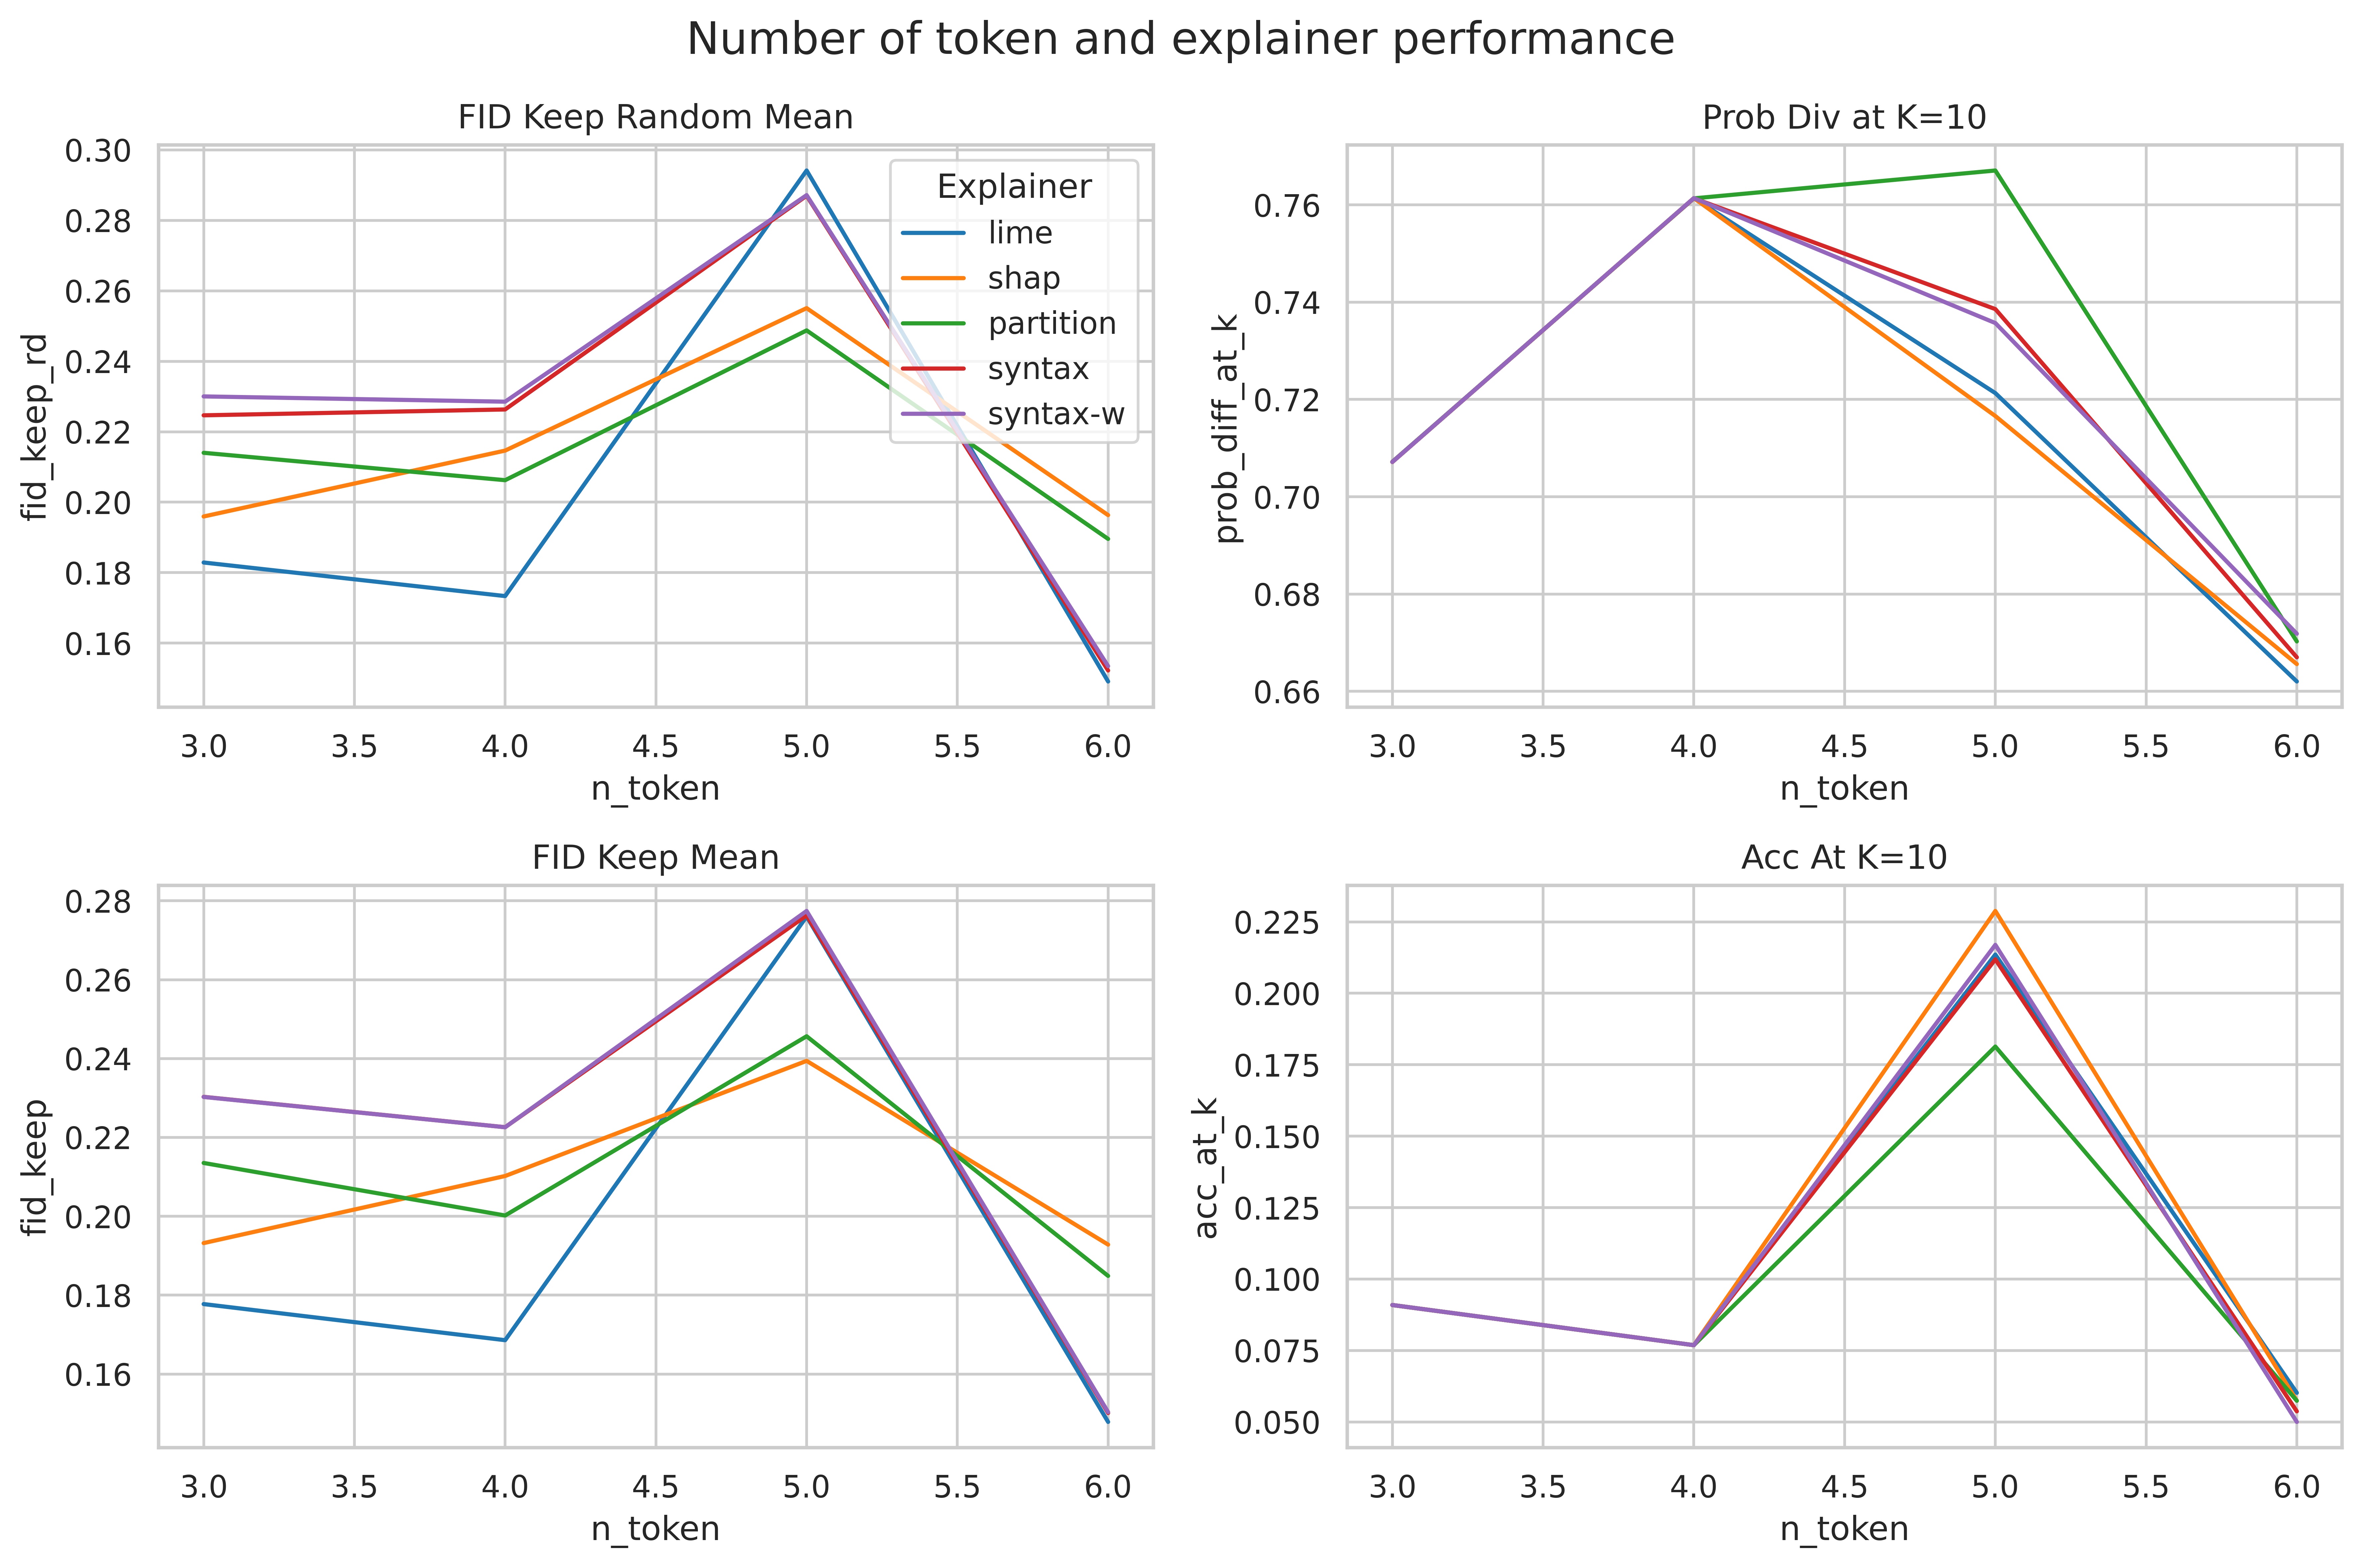

In [8]:
df = df_final_single_threshold.groupby(['algorithm', 'n_token']).mean().reset_index()

# Define the order of algorithms and a colormap
algo_order = ["lime", "shap", "partition", "syntax", "syntax-w"]
palette = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)

# Plotting with Seaborn
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Creating a lineplot for each score
sns.lineplot(x='n_token', y='fid_keep_rd', hue='algorithm', data=df, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('FID Keep Random Mean')

sns.lineplot(x='n_token', y='fid_keep', hue='algorithm', data=df, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('FID Keep Mean')

sns.lineplot(x='n_token', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Prob Div at K=10')

sns.lineplot(x='n_token', y='acc_at_k', hue='algorithm', data=df, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Acc At K=10')

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot
axes[0, 0].legend(title='Explainer', loc='upper right')

fig.suptitle('Number of token and explainer performance', fontsize=16)

plt.tight_layout()
plt.show()

### Performance at Thresholds

In [27]:

folder_path = f"/cluster/work/zhang/kamara/syntax-shap/results_ids/scores/{model_name}/{dataset}"  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        if (file.endswith('.pkl')):
            # Extract dataset, model name, and algorithm from the filename
            dataset = parts[-5]
            model_name = parts[-4]
            algorithm = parts[-3]
            seed = parts[-2]
            threshold = parts[-1].split('.pkl')[0]  # Removes the file extension

            # Construct the full file path
            file_path = os.path.join(folder_path, file)

            # Read the pickle file
            with open(full_path, 'rb') as file:
                data = pickle.load(file)

            # Assuming the content is a dictionary, create a DataFrame
            df = pd.DataFrame(data)

            # Add the extracted details as new columns
            df['algorithm'] = algorithm
            df['n_token'] = df['input'].str.split().apply(len)
            df['threshold'] = eval(threshold)

            # Append to the list of dataframes
            df_list.append(df)

# Concatenate all dataframes in the list
df_final = pd.concat(df_list, ignore_index=True)
df_final


fid_keep_rd  fid_keep   fid_rmv  log_odds_keep  acc_at_k  \
0         0.026020  0.026020  0.015344     -10.166660       0.0   
1         0.525244  0.525244  0.398886     -13.171619       0.0   
2         0.023535  0.021639  0.016398      -2.518190       0.1   
3         0.007370  0.007370  0.007370      -8.905312       0.1   
4         0.031653  0.031653 -0.046689     -10.362617       0.0   
...            ...       ...       ...            ...       ...   
52007     0.538499  0.320523  0.582591      -0.774665       0.6   
52008     0.000740 -0.000801  0.000740       0.733186       0.8   
52009     0.064365  0.014903  0.064365      -0.263366       0.8   
52010     0.536786  0.536786  0.536786     -13.193357       0.2   
52011     0.007962 -0.008185  0.168879       0.047327       0.7   

       prob_diff_at_k  input_id  \
0            0.634664       677   
1            0.906619      1804   
2            0.612839      1169   
3            0.473995        31   
4            0.747616       532   
...               ...       ...   
52007        0.153355      1597   
52008        0.098779      1014   
52009        0.048494       392   
52010        0.762018       380   
52011        0.060083      1875   

                                                   input  algorithm  n_token  \
0                    I bought a new laptop from the shop  partition        8   
1      Many kids smiled back at him and John knew he ...  partition       14   
2               We knew no one would want to buy an ugly  partition       10   
3                        She eventually stopped after an  partition        5   
4                         He sent his resume out to many  partition        7   
...                                                  ...        ...      ...   
52007  I turned the paper in early and got a good gra...     syntax       12   
52008      Lisa decided to stop at a gas station and buy     syntax       10   
52009                             Last month I got a new     syntax        6   
52010                     He started speaking in a lower     syntax        6   
52011  When he reached up to take off his shirt his a...     syntax       14   

       threshold  
0            0.2  
1            0.2  
2            0.2  
3            0.2  
4            0.2  
...          ...  
52007        0.9  
52008        0.9  
52009        0.9  
52010        0.9  
52011        0.9  

[52012 rows x 11 columns]

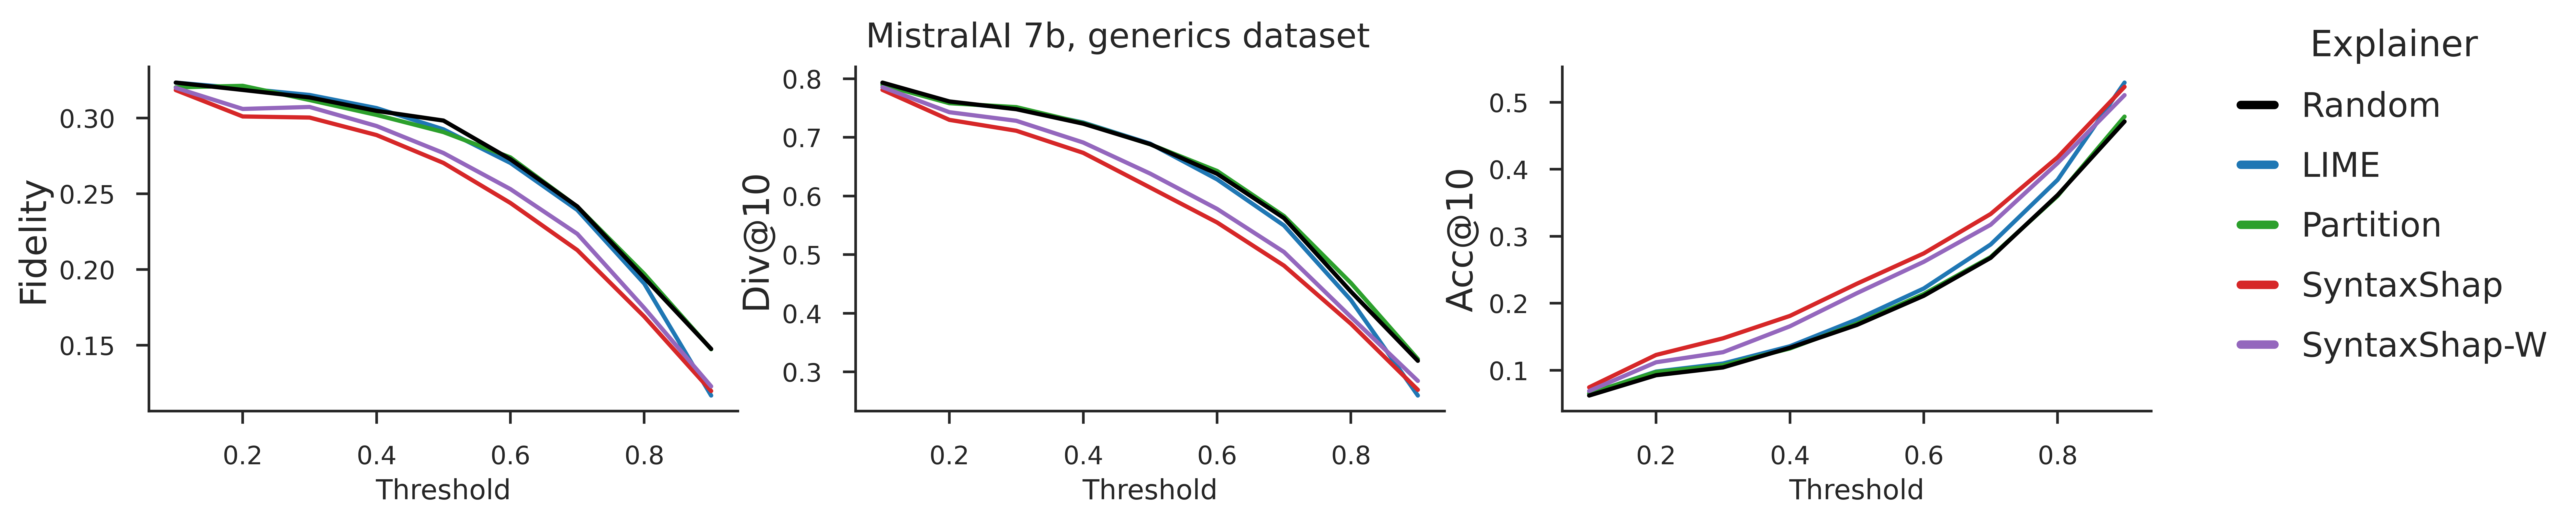

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = df_final.groupby(['algorithm', 'threshold']).mean().reset_index()
df = df[df['algorithm'] != 'shap']

# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "shap", "partition", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'shap': 'NaiveShap', 'partition': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "NaiveShap": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4]}   

#legend_order = ["Random", "LIME", "NaiveShap", "Partition", "SyntaxShap", "SyntaxShap-W"]
legend_order = ["Random", "LIME", "Partition", "SyntaxShap", "SyntaxShap-W"]

fig, axes = plt.subplots(1, 3, figsize=(17,3))

# Adjusting various parameters
# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Creating a lineplot for each score
sns.lineplot(x='threshold', y='fid_keep', hue='algorithm', data=df, ax=axes[0], palette=dict_color, linewidth=2)
axes[0].set_title('')
axes[0].set_xlabel('Threshold', fontsize=13)
axes[0].set_ylabel('Fidelity', fontsize=17)
axes[0].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[1], palette=dict_color, linewidth=2)
axes[1].set_title('')
axes[1].set_xlabel('Threshold', fontsize=13)
axes[1].set_ylabel('Div@10', fontsize=17)
axes[1].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='acc_at_k', hue='algorithm', data=df, ax=axes[2], palette=dict_color, linewidth=2)
axes[2].set_title('')
axes[2].set_xlabel('Threshold', fontsize=13)
axes[2].set_ylabel('Acc@10', fontsize=17)
axes[2].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[2].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[2].legend(ordered_handles, ordered_labels, title='Explainer', loc='upper left', bbox_to_anchor=(1.1, 1.2), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(4)  # Increase line width in legend

fig.suptitle(f'MistralAI 7b, {dataset} dataset', fontsize=16)  # Adjust suptitle position

sns.despine()
#plt.tight_layout()
plt.show()

fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/{dataset}/scores_{model_name}_{dataset}_no_shap.pdf", bbox_inches='tight', dpi=600)


In [28]:
#### Select rows which input_ids are in the list of input_ids of the rows with algorithm = 'shap'

# Extract input_id values where algorithm is 'shap'
shap_input_ids = df_final[df_final['algorithm'] == 'shap']['input_id'].unique()

# Filter the DataFrame to keep rows where input_id is in shap_input_ids
filtered_df_final = df_final[df_final['input_id'].isin(shap_input_ids)]
filtered_df_final

fid_keep_rd  fid_keep   fid_rmv  log_odds_keep  acc_at_k  \
0         0.026020  0.026020  0.015344     -10.166660       0.0   
2         0.023535  0.021639  0.016398      -2.518190       0.1   
3         0.007370  0.007370  0.007370      -8.905312       0.1   
4         0.031653  0.031653 -0.046689     -10.362617       0.0   
5         0.549898  0.431972  0.189108      -1.460879       0.2   
...            ...       ...       ...            ...       ...   
52003    -0.030409 -0.020629  0.103241       0.160526       0.9   
52005     0.051372  0.043982  0.033465      -1.938864       0.4   
52008     0.000740 -0.000801  0.000740       0.733186       0.8   
52009     0.064365  0.014903  0.064365      -0.263366       0.8   
52010     0.536786  0.536786  0.536786     -13.193357       0.2   

       prob_diff_at_k  input_id  \
0            0.634664       677   
2            0.612839      1169   
3            0.473995        31   
4            0.747616       532   
5            0.656830       473   
...               ...       ...   
52003        0.098013       901   
52005        0.169406        36   
52008        0.098779      1014   
52009        0.048494       392   
52010        0.762018       380   

                                               input  algorithm  n_token  \
0                I bought a new laptop from the shop  partition        8   
2           We knew no one would want to buy an ugly  partition       10   
3                    She eventually stopped after an  partition        5   
4                     He sent his resume out to many  partition        7   
5                    Sally went on a first date with  partition        7   
...                                              ...        ...      ...   
52003       At first it seemed fine but soon it grew     syntax        9   
52005                     It repeatedly shut off and     syntax        5   
52008  Lisa decided to stop at a gas station and buy     syntax       10   
52009                         Last month I got a new     syntax        6   
52010                 He started speaking in a lower     syntax        6   

       threshold  
0            0.2  
2            0.2  
3            0.2  
4            0.2  
5            0.2  
...          ...  
52003        0.9  
52005        0.9  
52008        0.9  
52009        0.9  
52010        0.9  

[32320 rows x 11 columns]

In [29]:
filtered_df_final['input_id'].nunique(), df_final['input_id'].nunique()

(608, 1046)

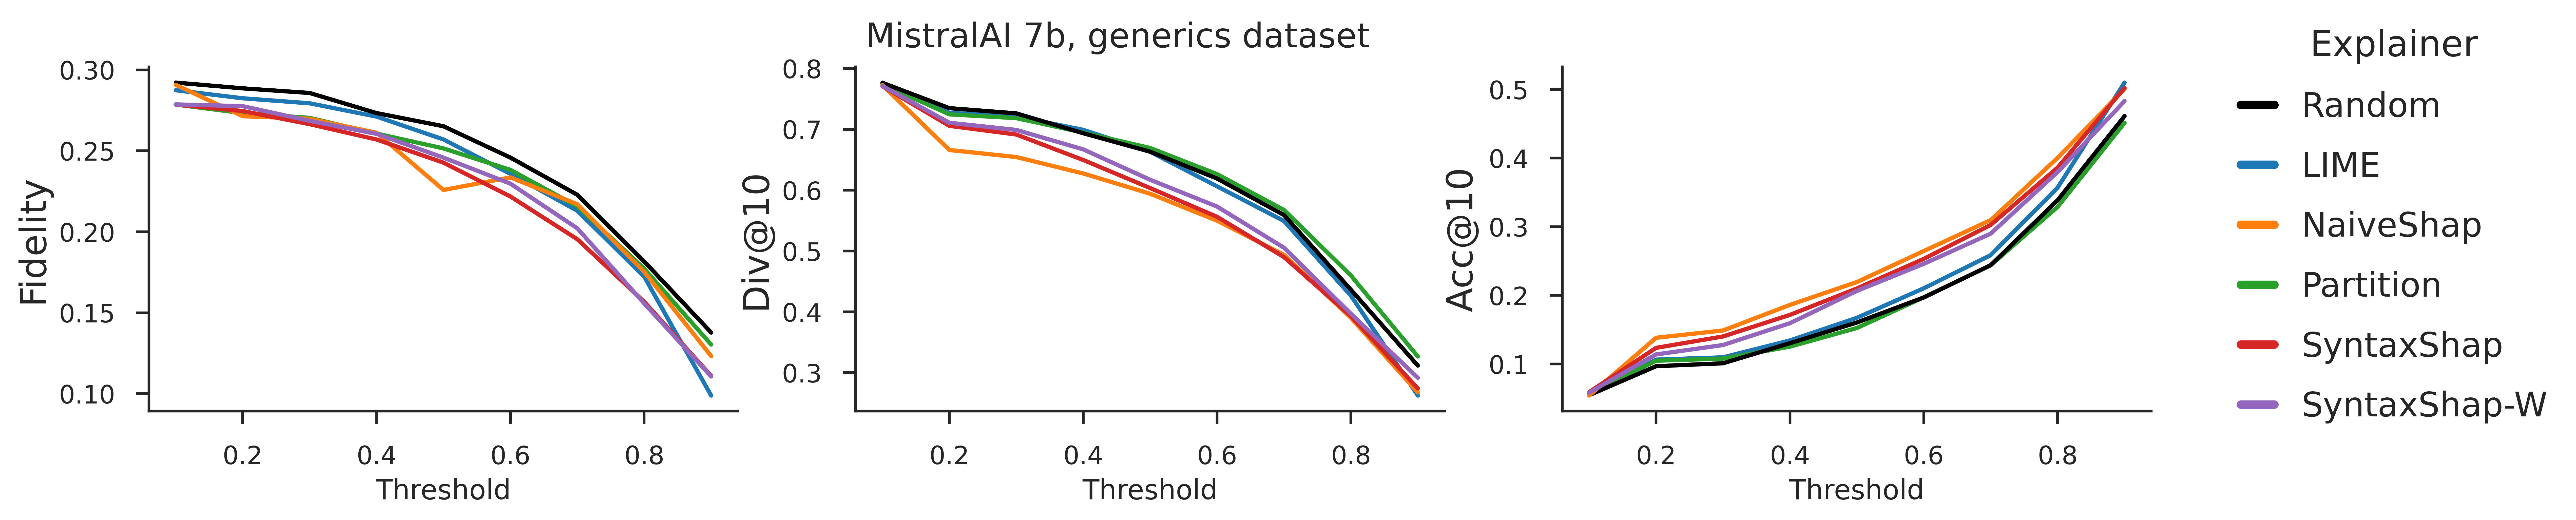

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Grouping and aggregating data
df = filtered_df_final.groupby(['algorithm', 'threshold']).mean().reset_index()

# Define the order of algorithms and a colormap
algo_order = ["random", "lime", "shap", "partition", "syntax", "syntax-w"]
pal = sns.color_palette("tab10", len(algo_order))

# Ensure 'algorithm' column is categorical and ordered
df['algorithm'] = pd.Categorical(df['algorithm'], categories=algo_order, ordered=True)
df['algorithm'] = df['algorithm'].replace({'lime': 'LIME', 'shap': 'NaiveShap', 'partition': 'Partition', 'syntax': 'SyntaxShap', 'syntax-w': 'SyntaxShap-W', 'random': 'Random'})
dict_color = {"Random": 'black', "LIME": pal[0], "NaiveShap": pal[1], "Partition": pal[2], "SyntaxShap": pal[3], "SyntaxShap-W": pal[4]}   

legend_order = ["Random", "LIME", "NaiveShap", "Partition", "SyntaxShap", "SyntaxShap-W"]

fig, axes = plt.subplots(1, 3, figsize=(17,3))

# Adjusting various parameters
# Plotting with Seaborn
sns.set(style="whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize" : 15, "ytick.labelsize" : 15})


# Creating a lineplot for each score
sns.lineplot(x='threshold', y='fid_keep', hue='algorithm', data=df, ax=axes[0], palette=dict_color, linewidth=2)
axes[0].set_title('')
axes[0].set_xlabel('Threshold', fontsize=13)
axes[0].set_ylabel('Fidelity', fontsize=17)
axes[0].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='prob_diff_at_k', hue='algorithm', data=df, ax=axes[1], palette=dict_color, linewidth=2)
axes[1].set_title('')
axes[1].set_xlabel('Threshold', fontsize=13)
axes[1].set_ylabel('Div@10', fontsize=17)
axes[1].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

sns.lineplot(x='threshold', y='acc_at_k', hue='algorithm', data=df, ax=axes[2], palette=dict_color, linewidth=2)
axes[2].set_title('')
axes[2].set_xlabel('Threshold', fontsize=13)
axes[2].set_ylabel('Acc@10', fontsize=17)
axes[2].tick_params(axis='both', which='major', labelsize=12, pad=10)  # Increase tick font size and padding

# Remove legends from all but one plot
for ax in axes.flat:
    ax.legend().remove()

# Add the legend back to the first subplot with custom settings
handles, labels = axes[2].get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]
legend = axes[2].legend(ordered_handles, ordered_labels, title='Explainer', loc='upper left', bbox_to_anchor=(1.1, 1.2), fontsize=16, frameon=False, handlelength=1, labelspacing=0.8)
legend.get_title().set_fontsize('17')  # Increase legend title font size
for line in legend.get_lines():
    line.set_linewidth(4)  # Increase line width in legend

fig.suptitle(f'MistralAI 7b, {dataset} dataset', fontsize=16)  # Adjust suptitle position

sns.despine()
#plt.tight_layout()
plt.show()

fig.savefig(f"/cluster/home/kamara/syntax-shap/figures/{model_name}/{dataset}/scores_{model_name}_{dataset}_shap_filtered.pdf", bbox_inches='tight', dpi=600)
